In [78]:
# imports
import pandas as pd
import matplotlib.pyplot as plt

In [79]:
# get the data

lookupTable = pd.read_csv("LookupTable.csv")
data = pd.read_csv("UK_Travel_Area_Isochrones_(Nov_Dec_2022)_by_Public_Transport_and_Walking_for_Northern_Ireland_-_Generalised_to_10m.csv")
vacancies = pd.read_csv("Dataset_10308.csv")

In [80]:
data.head()

,OBJECTID,SA2011,node_dist,stop_dist,centre_in,node_in,stop_in,iso_cutoff,iso_date,iso_type,iso_hectar,centre_X,centre_Y,node_X,node_Y,stop_X,stop_Y,SHAPE_Length,SHAPE_Area
0,1,N00000001,13,881,1,1,0,900,12/6/2022,from_centroid,246,315463.48,379394.87,315459.49,379383.01,316093.14,380010.44,4539.359725,8.252778e+05
1,2,N00000001,13,881,1,1,0,1800,12/6/2022,from_centroid,432,315463.48,379394.87,315459.49,379383.01,316093.14,380010.44,7021.784606,1.448967e+06
2,3,N00000001,13,881,1,1,0,2700,12/6/2022,from_centroid,454,315463.48,379394.87,315459.49,379383.01,316093.14,380010.44,7058.003585,1.520242e+06
3,4,N00000001,13,881,1,1,0,3600,12/6/2022,from_centroid,454,315463.48,379394.87,315459.49,379383.01,316093.14,380010.44,7058.003585,1.520242e+06
4,5,N00000002,23,201,1,1,1,900,12/6/2022,from_centroid,698,315570.54,376723.87,315553.49,376739.97,315369.51,376729.00,12986.130110,2.344882e+06


In [81]:
lookupTable.head()

,SA,SOA,HSCT,AA1998,AA2008,LGD1992NAME,WARD1992,Settlement2015(1),Settlement2015(2),URBAN_RURAL(2015),Area (hectares)
0,N00000001,95AA01S1,Northern HSCT,SOUTH ANTRIM,SOUTH ANTRIM,ANTRIM,ALDERGROVE,NaN,NaN,Rural,540
1,N00000002,95AA01S2,Northern HSCT,SOUTH ANTRIM,SOUTH ANTRIM,ANTRIM,ALDERGROVE,CRUMLIN,NaN,Mixed urban/rural,166
2,N00000003,95AA01S2,Northern HSCT,SOUTH ANTRIM,SOUTH ANTRIM,ANTRIM,ALDERGROVE,NaN,NaN,Rural,499
3,N00000004,95AA01S2,Northern HSCT,SOUTH ANTRIM,SOUTH ANTRIM,ANTRIM,ALDERGROVE,NaN,NaN,Rural,1508
4,N00000005,95AA01S2,Northern HSCT,SOUTH ANTRIM,SOUTH ANTRIM,ANTRIM,ALDERGROVE,NaN,NaN,Rural,808


In [82]:
data.describe()

,OBJECTID,node_dist,stop_dist,centre_in,node_in,stop_in,iso_cutoff,iso_hectar,centre_X,centre_Y,node_X,node_Y,stop_X,stop_Y,SHAPE_Length,SHAPE_Area
count,18148.000000,18148.000000,18148.000000,18148.0,18148.000000,18148.000000,18148.000000,18148.000000,18148.000000,18148.000000,18148.000000,18148.000000,18148.000000,18148.000000,1.814800e+04,1.814800e+04
mean,9074.500000,25.619572,367.898611,1.0,0.968481,0.549262,2250.000000,13745.473055,310619.766912,376223.594670,310619.925438,376223.550685,310633.869171,376239.535449,1.368250e+05,4.608766e+07
std,5239.020678,27.727887,611.429745,0.0,0.174719,0.497581,1006.258314,17047.299650,35227.737547,26161.112163,35227.382498,26161.030267,35206.397556,26178.654539,1.579064e+05,5.742347e+07
min,1.000000,1.000000,5.000000,1.0,0.000000,0.000000,900.000000,0.000000,193153.790000,311504.640000,193169.730000,311503.370000,194069.110000,311849.200000,0.000000e+00,-3.535575e+08
25%,4537.750000,15.000000,106.000000,1.0,1.000000,0.000000,1575.000000,1063.000000,290033.570000,361925.990000,290061.360000,361931.980000,289931.160000,361883.610000,1.611733e+04,3.568677e+06
50%,9074.500000,20.000000,175.000000,1.0,1.000000,1.000000,2250.000000,7471.000000,325587.540000,374008.870000,325587.560000,374005.750000,325615.770000,373993.240000,7.612719e+04,2.503583e+07
75%,13611.250000,27.000000,319.000000,1.0,1.000000,1.000000,2925.000000,19679.750000,335643.810000,388395.930000,335627.520000,388387.500000,335709.690000,388382.040000,2.016081e+05,6.604671e+07
max,18148.000000,523.000000,11279.000000,1.0,1.000000,1.000000,3600.000000,128997.000000,365918.300000,443094.780000,365933.560000,443095.680000,366016.710000,444485.020000,1.372508e+06,4.340544e+08


## DATA CLEANUP

In [83]:
# remove nulls
data.dropna()

,OBJECTID,SA2011,node_dist,stop_dist,centre_in,node_in,stop_in,iso_cutoff,iso_date,iso_type,iso_hectar,centre_X,centre_Y,node_X,node_Y,stop_X,stop_Y,SHAPE_Length,SHAPE_Area
0,1,N00000001,13,881,1,1,0,900,12/6/2022,from_centroid,246,315463.48,379394.87,315459.49,379383.01,316093.14,380010.44,4539.359725,8.252778e+05
1,2,N00000001,13,881,1,1,0,1800,12/6/2022,from_centroid,432,315463.48,379394.87,315459.49,379383.01,316093.14,380010.44,7021.784606,1.448967e+06
2,3,N00000001,13,881,1,1,0,2700,12/6/2022,from_centroid,454,315463.48,379394.87,315459.49,379383.01,316093.14,380010.44,7058.003585,1.520242e+06
3,4,N00000001,13,881,1,1,0,3600,12/6/2022,from_centroid,454,315463.48,379394.87,315459.49,379383.01,316093.14,380010.44,7058.003585,1.520242e+06
4,5,N00000002,23,201,1,1,1,900,12/6/2022,from_centroid,698,315570.54,376723.87,315553.49,376739.97,315369.51,376729.00,12986.130110,2.344882e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18143,18144,N00004536,17,131,1,1,0,3600,12/6/2022,from_centroid,25581,234148.49,397120.42,234158.73,397106.86,234083.05,397234.24,359221.678500,8.541539e+07
18144,18145,N00004537,13,57,1,1,1,900,12/6/2022,from_centroid,401,233754.49,397173.42,233754.09,397160.70,233758.57,397230.02,6863.804856,1.336382e+06
18145,18146,N00004537,13,57,1,1,1,1800,12/6/2022,from_centroid,3248,233754.49,397173.42,233754.09,397160.70,233758.57,397230.02,32529.755460,1.083254e+07
18146,18147,N00004537,13,57,1,1,1,2700,12/6/2022,from_centroid,6658,233754.49,397173.42,233754.09,397160.70,233758.57,397230.02,104620.551400,2.219330e+07


In [84]:
# remove duplicates
data = data.drop_duplicates()

In [85]:
data.head()

,OBJECTID,SA2011,node_dist,stop_dist,centre_in,node_in,stop_in,iso_cutoff,iso_date,iso_type,iso_hectar,centre_X,centre_Y,node_X,node_Y,stop_X,stop_Y,SHAPE_Length,SHAPE_Area
0,1,N00000001,13,881,1,1,0,900,12/6/2022,from_centroid,246,315463.48,379394.87,315459.49,379383.01,316093.14,380010.44,4539.359725,8.252778e+05
1,2,N00000001,13,881,1,1,0,1800,12/6/2022,from_centroid,432,315463.48,379394.87,315459.49,379383.01,316093.14,380010.44,7021.784606,1.448967e+06
2,3,N00000001,13,881,1,1,0,2700,12/6/2022,from_centroid,454,315463.48,379394.87,315459.49,379383.01,316093.14,380010.44,7058.003585,1.520242e+06
3,4,N00000001,13,881,1,1,0,3600,12/6/2022,from_centroid,454,315463.48,379394.87,315459.49,379383.01,316093.14,380010.44,7058.003585,1.520242e+06
4,5,N00000002,23,201,1,1,1,900,12/6/2022,from_centroid,698,315570.54,376723.87,315553.49,376739.97,315369.51,376729.00,12986.130110,2.344882e+06


In [86]:
data.describe()

,OBJECTID,node_dist,stop_dist,centre_in,node_in,stop_in,iso_cutoff,iso_hectar,centre_X,centre_Y,node_X,node_Y,stop_X,stop_Y,SHAPE_Length,SHAPE_Area
count,18148.000000,18148.000000,18148.000000,18148.0,18148.000000,18148.000000,18148.000000,18148.000000,18148.000000,18148.000000,18148.000000,18148.000000,18148.000000,18148.000000,1.814800e+04,1.814800e+04
mean,9074.500000,25.619572,367.898611,1.0,0.968481,0.549262,2250.000000,13745.473055,310619.766912,376223.594670,310619.925438,376223.550685,310633.869171,376239.535449,1.368250e+05,4.608766e+07
std,5239.020678,27.727887,611.429745,0.0,0.174719,0.497581,1006.258314,17047.299650,35227.737547,26161.112163,35227.382498,26161.030267,35206.397556,26178.654539,1.579064e+05,5.742347e+07
min,1.000000,1.000000,5.000000,1.0,0.000000,0.000000,900.000000,0.000000,193153.790000,311504.640000,193169.730000,311503.370000,194069.110000,311849.200000,0.000000e+00,-3.535575e+08
25%,4537.750000,15.000000,106.000000,1.0,1.000000,0.000000,1575.000000,1063.000000,290033.570000,361925.990000,290061.360000,361931.980000,289931.160000,361883.610000,1.611733e+04,3.568677e+06
50%,9074.500000,20.000000,175.000000,1.0,1.000000,1.000000,2250.000000,7471.000000,325587.540000,374008.870000,325587.560000,374005.750000,325615.770000,373993.240000,7.612719e+04,2.503583e+07
75%,13611.250000,27.000000,319.000000,1.0,1.000000,1.000000,2925.000000,19679.750000,335643.810000,388395.930000,335627.520000,388387.500000,335709.690000,388382.040000,2.016081e+05,6.604671e+07
max,18148.000000,523.000000,11279.000000,1.0,1.000000,1.000000,3600.000000,128997.000000,365918.300000,443094.780000,365933.560000,443095.680000,366016.710000,444485.020000,1.372508e+06,4.340544e+08


## DATA PROCESSING

In [87]:
# Join the SA2011 id to get the name of the items
data = data.set_index('SA2011').join(lookupTable.set_index('SA'))

In [88]:
print(data)

           OBJECTID  node_dist  stop_dist  centre_in  node_in  stop_in  \
N00000001         1         13        881          1        1        0   
N00000001         2         13        881          1        1        0   
N00000001         3         13        881          1        1        0   
N00000001         4         13        881          1        1        0   
N00000002         5         23        201          1        1        1   
...             ...        ...        ...        ...      ...      ...   
N00004536     18144         17        131          1        1        0   
N00004537     18145         13         57          1        1        1   
N00004537     18146         13         57          1        1        1   
N00004537     18147         13         57          1        1        1   
N00004537     18148         13         57          1        1        1   

           iso_cutoff   iso_date       iso_type  iso_hectar  ...       SOA  \
N00000001         900  12/6/2022 

In [89]:
data.keys()

Index(['OBJECTID', 'node_dist', 'stop_dist', 'centre_in', 'node_in', 'stop_in',
       'iso_cutoff', 'iso_date', 'iso_type', 'iso_hectar', 'centre_X',
       'centre_Y', 'node_X', 'node_Y', 'stop_X', 'stop_Y', 'SHAPE_Length',
       'SHAPE_Area', 'SOA', 'HSCT', 'AA1998', 'AA2008', 'LGD1992NAME',
       'WARD1992', 'Settlement2015(1)', 'Settlement2015(2)',
       'URBAN_RURAL(2015)', 'Area (hectares)'],
      dtype='object')

In [90]:
data.describe(include="all")

,OBJECTID,node_dist,stop_dist,centre_in,node_in,stop_in,iso_cutoff,iso_date,iso_type,iso_hectar,...,SOA,HSCT,AA1998,AA2008,LGD1992NAME,WARD1992,Settlement2015(1),Settlement2015(2),URBAN_RURAL(2015),Area (hectares)
count,18148.000000,18148.000000,18148.000000,18148.0,18148.000000,18148.000000,18148.000000,18148,18148,18148.000000,...,18148,18148,18024,18148,18148,18148,13948,52,18148,18148.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,4,NaN,...,890,5,18,18,26,582,136,13,3,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12/6/2022,from_centroid,NaN,...,95XX23W1,Northern HSCT,STRANGFORD,BELFAST SOUTH,BELFAST,BOTANIC,BELFAST CITY,ANTRIM,Urban,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18148,18112,NaN,...,40,4644,1140,1252,3264,104,3264,4,11764,NaN
mean,9074.500000,25.619572,367.898611,1.0,0.968481,0.549262,2250.000000,NaN,NaN,13745.473055,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,298.920432
std,5239.020678,27.727887,611.429745,0.0,0.174719,0.497581,1006.258314,NaN,NaN,17047.299650,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,711.574677
min,1.000000,1.000000,5.000000,1.0,0.000000,0.000000,900.000000,NaN,NaN,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000
25%,4537.750000,15.000000,106.000000,1.0,1.000000,0.000000,1575.000000,NaN,NaN,1063.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.000000
50%,9074.500000,20.000000,175.000000,1.0,1.000000,1.000000,2250.000000,NaN,NaN,7471.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.000000
75%,13611.250000,27.000000,319.000000,1.0,1.000000,1.000000,2925.000000,NaN,NaN,19679.750000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,201.000000


In [91]:
# Split into time 900 (15 mins) 1800(30 mins) etc
data900 = data.query("iso_cutoff == 900")

data1800 = data.query("iso_cutoff == 1800")

data2700 = data.query("iso_cutoff == 2700")

data3600 = data.query("iso_cutoff == 3600")

In [92]:
vacancies.head()

,SOA,Vacancies Notified
0,Northern Ireland,"74,293"
1,Abbey 1,1
2,Abbey 2,0
3,Abbey Park,"4,869"
4,Academy,33


In [93]:
vac_int1 = vacancies['Vacancies Notified'][0]
vac_int2 = int(vac_int1.replace(',',''))
print(vac_int2)

74293


In [112]:
x = dict();
for y,row in enumerate(vacancies.get(key='SOA')):
    found = False;
    for key in x.keys():
        row = ''.join([i for i in row if not i.isdigit()]).rstrip()
        if(key == row):
            found = True;
    if(not found):
        vac = vacancies['Vacancies Notified'][y]
        vac = int(vac.replace(',',''))
        x[row] = vac
    else:
        vac = vacancies['Vacancies Notified'][y]
        vac = int(vac.replace(',',''))
        x[row] = int(x[row]) + int(vac)

In [123]:
listOfValue = []
for y,key in enumerate (x.keys()):
    listOfValue.append(x.get(key))

tempDict = {'Location': x.keys(),
"reported Vacancies" : listOfValue}

vac1 = pd.DataFrame.from_dict(tempDict)

In [95]:
print(x["Abbey"])

1


In [100]:
sum = data.groupby(['LGD1992NAME']).sum()
print(sum)

                OBJECTID  node_dist  stop_dist  centre_in  node_in  stop_in  \
LGD1992NAME                                                                   
ANTRIM            133386      11836     216308        516      508      264   
ARDS              808492      18460     254624        856      828      492   
ARMAGH            871682      10676     275732        532      532      368   
BALLYMENA        1485036      15208     269788        664      644      404   
BALLYMONEY        781200      10044     133104        288      284      188   
BANBRIDGE        1353660      10568     236652        440      432      248   
BELFAST         16086624      76744     485716       3264     3060     1412   
CARRICKFERGUS    2955426      10016      99240        436      420      204   
CASTLEREAGH      5668224      16260     140860        768      744      372   
COLERAINE        4771816      13976     213412        592      584      348   
COOKSTOWN        2725280      17168     240896      

In [128]:
print(data.get(key="LGD1992NAME"))

N00000001      ANTRIM
N00000001      ANTRIM
N00000001      ANTRIM
N00000001      ANTRIM
N00000002      ANTRIM
               ...   
N00004536    STRABANE
N00004537    STRABANE
N00004537    STRABANE
N00004537    STRABANE
N00004537    STRABANE
Name: LGD1992NAME, Length: 18148, dtype: object


In [129]:
# data.set_index('SA2011').join(lookupTable.set_index('SA'))
dataJoin = data.set_index('LGD1992NAME').join(vac1.set_index('Location'))

In [130]:
print(dataJoin)

          OBJECTID  node_dist  stop_dist  centre_in  node_in  stop_in  \
ANTRIM           1         13        881          1        1        0   
ANTRIM           2         13        881          1        1        0   
ANTRIM           3         13        881          1        1        0   
ANTRIM           4         13        881          1        1        0   
ANTRIM           5         23        201          1        1        1   
...            ...        ...        ...        ...      ...      ...   
STRABANE     18144         17        131          1        1        0   
STRABANE     18145         13         57          1        1        1   
STRABANE     18146         13         57          1        1        1   
STRABANE     18147         13         57          1        1        1   
STRABANE     18148         13         57          1        1        1   

          iso_cutoff   iso_date       iso_type  iso_hectar  ...       SOA  \
ANTRIM           900  12/6/2022  from_centroid

## Visualization

In [ ]:
# The average distance of public transport per location
sum = data.groupby(["LGD1992NAME"])['stop_dist'].sum()
total = data.groupby(["LGD1992NAME"])['stop_dist'].count()
average = sum/total

In [ ]:
average.to_dict()

{'ANTRIM': 419.2015503875969,
 'ARDS': 297.4579439252336,
 'ARMAGH': 518.2932330827068,
 'BALLYMENA': 406.3072289156627,
 'BALLYMONEY': 462.1666666666667,
 'BANBRIDGE': 537.8454545454546,
 'BELFAST': 148.81004901960785,
 'CARRICKFERGUS': 227.61467889908258,
 'CASTLEREAGH': 183.41145833333334,
 'COLERAINE': 360.4932432432432,
 'COOKSTOWN': 752.8,
 'CRAIGAVON': 288.30973451327435,
 'DERRY': 223.2415254237288,
 'DOWN': 398.475,
 'DUNGANNON': 525.2416666666667,
 'FERMANAGH': 806.083870967742,
 'LARNE': 363.2659574468085,
 'LIMAVADY': 661.0126582278481,
 'LISBURN': 266.5087108013937,
 'MAGHERAFELT': 751.6907216494845,
 'MOYLE': 488.3488372093023,
 'NEWRY & MOURNE': 529.5681818181819,
 'NEWTOWNABBEY': 196.4304932735426,
 'NORTH DOWN': 200.0701754385965,
 'OMAGH': 880.7870370370371,
 'STRABANE': 1088.9565217391305}

In [ ]:
def getValue():
    temp = []
    for key in average.keys():
        temp.append(average.get(key=key))
    return temp

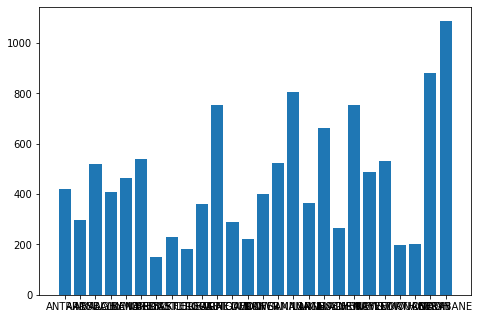

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
langs = average.keys()
students = getValue()
ax.bar(langs,students)
plt.show()